In [1]:
import scipy.io
frey = scipy.io.loadmat("/Users/mpiekenbrock/Downloads/frey_rawface.mat")
faces = frey['ff'].T

In [2]:
faces.shape

(1965, 560)

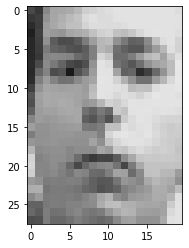

In [17]:
import numpy as np
import matplotlib.pyplot as plt
plt.imshow(faces[500,:].reshape((28,20)), cmap='gray', vmin=0, vmax=255)
plt.show()


In [18]:
base_face = faces[500,:].reshape((28,20))

In [53]:
#noise = np.random.normal(size=(28*3, 20*3))
#skimage.util.random_noise(img, mode=mode)
#import cv2


def embed_face(x,y):
	noise = np.random.normal(loc=0, scale=1, size=(28*2, 20*3))
	image = 255*((noise - noise.min())/(noise.max()-noise.min()))
	image[x:(x+28), y:(y+20)] = base_face
	return(image)

embedded_faces = []
for x in range(0, 28*1 + 1):
	for y in range(0, 20*2 + 1):
		embedded_faces.append(embed_face(x,y))

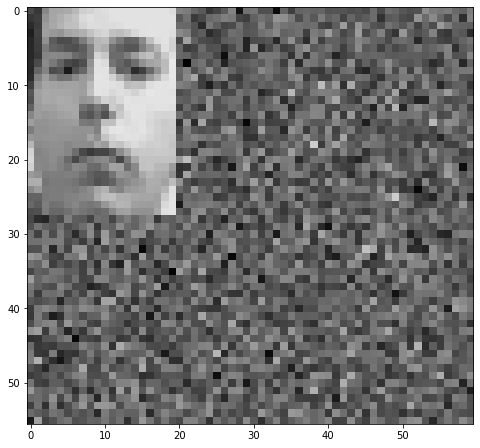

In [54]:
plt.figure(figsize=(8, 15))
plt.imshow(embedded_faces[0].reshape(28*2, 20*3), cmap='gray', vmin=0, vmax=255)
plt.show()

In [55]:
face_data = np.vstack([np.ravel(face) for face in embedded_faces])
import pickle
with open('../data/frey_face_embedded.pickle', 'wb') as handle:
    pickle.dump(face_data, handle, protocol=pickle.HIGHEST_PROTOCOL)

In [49]:
# from src.tallem import TALLEM
# from src.tallem.cover import IntervalCover
# from src.tallem.datasets import mobius_band
# from src.tallem.dimred import mmds
# from src.tallem.distance import dist

ModuleNotFoundError: No module named 'src.tallem'